In [227]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
import os
import sklearn
import pickle

In [228]:
#load and read csv file
data_module= pd.read_csv("bike_sharing.csv")
data_module.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [229]:
data_module=data_module[['temp','cnt']]
data_module.head()

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


In [230]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp    17379 non-null float64
cnt     17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [231]:
data_module.describe()

,temp,cnt
count,17379.000000,17379.000000
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


In [232]:
data_module.isnull().sum()

temp    0
cnt     0
dtype: int64

In [233]:
#split dataset into train data an dtest data
train,test= train_test_split(data_module,test_size=0.2,random_state=0)

In [234]:
print("train data:",train.shape)
print("test data:",test.shape)

train data: (13903, 2)
test data: (3476, 2)


In [235]:
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index=False)

In [236]:
train_module= pd.read_csv("train.csv")
train_module.head()

,temp,cnt
0,0.30,157
1,0.30,164
2,0.46,79
3,0.80,845
4,0.56,122


In [237]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_module,test_size=0.3,random_state=0)

In [238]:
x_train = train_data.iloc[:,:-1].values
y_train = train_data.iloc[:,1].values

In [239]:
print("x_train data set",x_train.shape)
print("y_train data set",y_train.shape)

x_train data set (9732, 1)
y_train data set (9732,)


In [240]:
#feature scalling on cross-validate data
sc_x= StandardScaler()
sc_y= StandardScaler()
x_train= sc_x.fit_transform(x_train.reshape(-1,1))
y_train=sc_y.fit_transform(y_train.reshape(-1,1))

In [241]:
# fitting simple linear regression to the training dataset
regressor = DecisionTreeRegressor() 
regressor.fit( x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [242]:
cv_data.to_csv("cv_data.csv",index= False)

In [243]:
cv_data_x = cv_data.iloc[:,:-1].values
cv_data_y= cv_data.iloc[:,1].values

In [244]:
print("cross validate data x:",cv_data_x.shape)
print("cross_validate data y:",cv_data_y.shape)

cross validate data x: (4171, 1)
cross_validate data y: (4171,)


In [245]:
#feature scalling on cross-validate data
sc_cv_x= StandardScaler()
sc_cv_y= StandardScaler()
cv_data_x= sc_x.fit_transform(cv_data_x.reshape(-1,1))
cv_data_y=sc_y.fit_transform(cv_data_y.reshape(-1,1))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
pickle file created
y_predict train: [ 0.03834063  0.10869626 -0.12605645 ...  0.05719993 -0.60464988
  0.08027822]
accuracy of train data 82.78307432601912


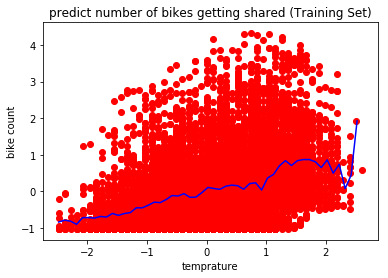

In [246]:
class Decision_problem:
    def Decision_model(self,x_train,y_train):
        regressor = DecisionTreeRegressor() 
        regressor = regressor.fit( x_train, y_train)
        return regressor
    def pickle_file(self,regressor):
        file =open("DecisionTree.pkl","wb")
        pickle.dump(regressor,file)
        file.close()
    
    def y_predict_train(self,regressor,x_train):
        y_predict_train=regressor.predict(x_train)
        return y_predict_train
    
    def accuracy(self,y_predict_train,y_train):
#         accuracy = sklearn.metrics.r2_score(y_train,y_predict_train)*100
#         return accuracy
        accuracy =sklearn.metrics.mean_squared_error(y_train,y_predict_train)*100
        return accuracy
    
    
    
    def visualization_train(self,x_train,y_train,y_predict_train):
        x_grid=np.arange(min(x_train),max(x_train),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_train,y_train,color='red')
        plt.plot(x_grid,regressor.predict(x_grid),color='blue')
        plt.title('predict number of bikes getting shared (Training Set)')
        plt.xlabel('temprature')
        plt.ylabel('bike count')
        plt.show()
                
def main():
    obj= Decision_problem()
    
    regressor=obj.Decision_model(x_train,y_train)
    print(regressor)
    
    obj.pickle_file(regressor)
    print("pickle file created")
    
    y_predict_train=obj.y_predict_train(regressor,x_train)
    print("y_predict train:",y_predict_train)
    
    accuracy=obj.accuracy(y_predict_train,y_train)
    print("accuracy of train data",accuracy)
    
    obj.visualization_train(x_train,y_train,y_predict_train)
    
if __name__ == '__main__':
    main()
 


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
y_predict train: [ 0.14286146 -0.38716648 -0.64373289 ...  0.7130603   0.09569133
 -0.26649543]
accuracy 81.55730967827807


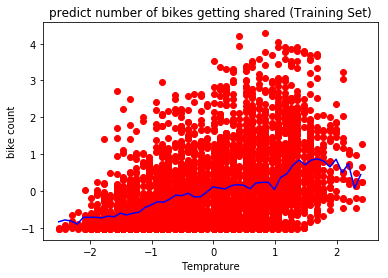

In [247]:
class cross_validation:
    def cv_model(self,cv_data_x,cv_data_y):
        # fitting simple linear regression to the training dataset
        regressor = DecisionTreeRegressor() 
        regressor = regressor.fit( cv_data_x,cv_data_y)
        return regressor
    def y_predict_test(self,regressor,cv_data_x):
        y_predict_test= regressor.predict(cv_data_x)
        return y_predict_test
    
    def accuracy(self,y_predict_test,cv_data_y):
        accuracy =sklearn.metrics.mean_squared_error(cv_data_y,y_predict_test)*100
        return accuracy
    
    def visualization_train(self,cv_data_x,cv_data_y,y_predict_test):
        x_grid=np.arange(min(cv_data_x),max(cv_data_x),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(cv_data_x,cv_data_y,color='red')
        plt.plot(x_grid,regressor.predict(x_grid),color='blue')
        plt.title('predict number of bikes getting shared (Training Set)')
        plt.xlabel('Temprature')
        plt.ylabel('bike count')
        plt.show()

def main():
    obj= cross_validation()
    regressor=obj.cv_model(cv_data_x,cv_data_y)
    print(regressor)
    
    y_predict_test=obj.y_predict_test(regressor,cv_data_x)
    print("y_predict train:",y_predict_test)
    
    accuracy=obj.accuracy(y_predict_test,cv_data_y)
    print("accuracy",accuracy)

    obj.visualization_train(cv_data_x,cv_data_y,y_predict_test)

if __name__ == '__main__':
    main()
